In [11]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [15]:
train_csv_path = 'Dataset/NEW/5 Fashion MNIST/fashion-mnist_train.csv'
test_csv_path  = 'Dataset/NEW/5 Fashion MNIST/fashion-mnist_test.csv'

In [16]:
train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)

In [17]:
x_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
x_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

In [18]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

In [19]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

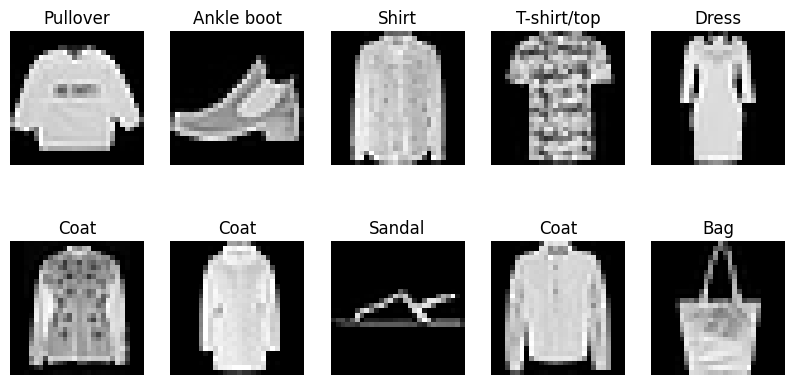

In [21]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(class_names[y_train[i].argmax()])
    plt.axis('off')
plt.show()

In [22]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

C:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 58s 63ms/step - accuracy: 0.7082 - loss: 0.8180 - val_accuracy: 0.8522 - val_loss: 0.4183
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 36s 48ms/step - accuracy: 0.8563 - loss: 0.3932 - val_accuracy: 0.8766 - val_loss: 0.3349
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 36s 48ms/step - accuracy: 0.8819 - loss: 0.3267 - val_accuracy: 0.8821 - val_loss: 0.3197
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 37s 49ms/step - accuracy: 0.8944 - loss: 0.2875 - val_accuracy: 0.8967 - val_loss: 0.2912
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9058 - loss: 0.2588 - val_accuracy: 0.8932 - val_loss: 0.3038


In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest Accuracy: {test_acc:.4f}')

313/313 - 5s - 17ms/step - accuracy: 0.8961 - loss: 0.2878

Test Accuracy: 0.8961


In [26]:
predictions = model.predict(x_test)
predicted_classes = predictions.argmax(axis=1)
true_classes = y_test.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


In [27]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, predicted_classes))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.82      0.86      0.84      1000
           3       0.87      0.95      0.91      1000
           4       0.92      0.73      0.81      1000
           5       0.99      0.95      0.97      1000
           6       0.68      0.74      0.71      1000
           7       0.92      0.97      0.95      1000
           8       0.99      0.96      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



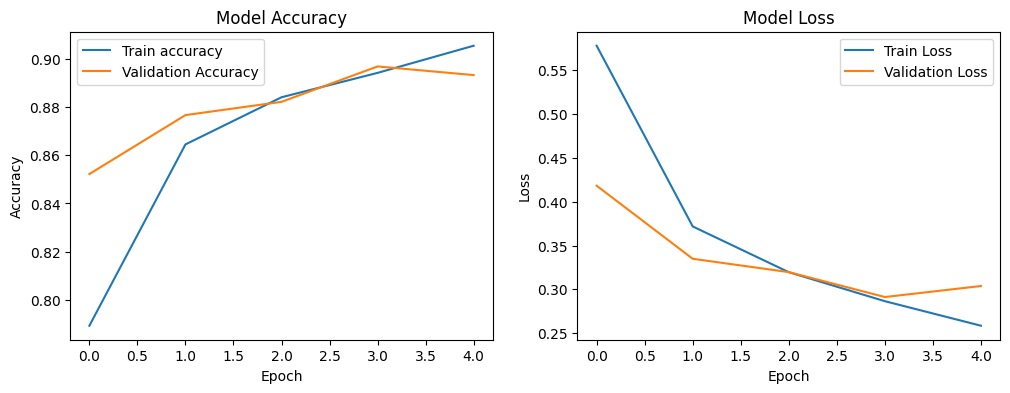

In [28]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()


# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

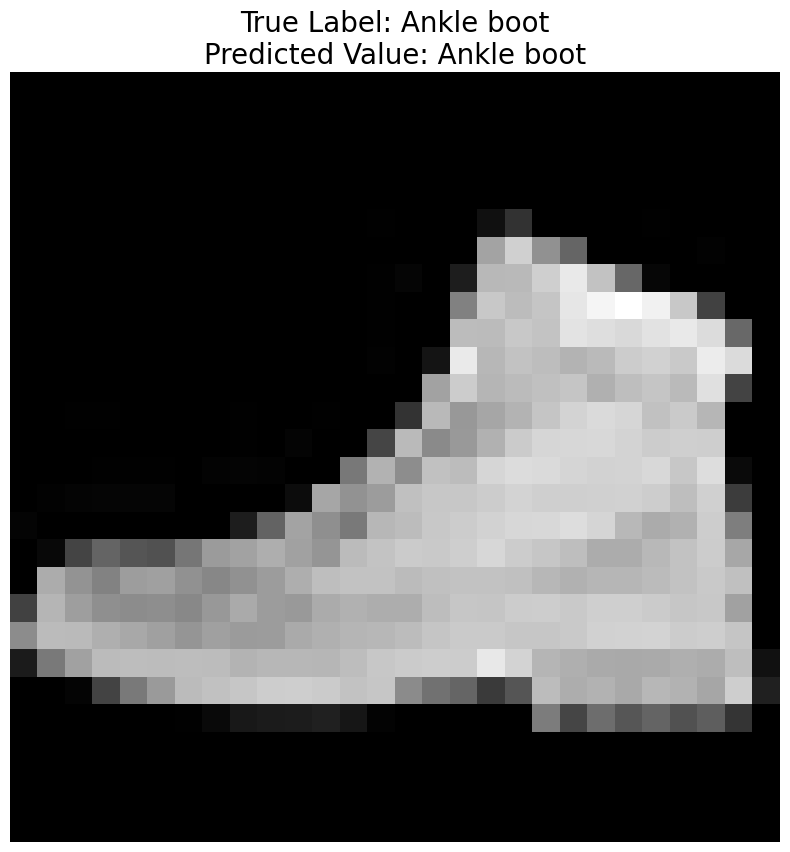

In [29]:
index = 80

true_label = class_names[true_classes[index]]
predicted_label = class_names[predicted_classes[index]]

plt.figure(figsize=[10, 10])
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title(f"True Label: {true_label}\nPredicted Value: {predicted_label}", size=20)
plt.axis('off')
plt.show()